In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', 500)
%matplotlib inline

In [2]:
first_flag = True
df_all = None
for folder in os.listdir('football_data/'):
    if ('.' in folder):
        continue
    for csv in os.listdir('football_data/{}/'.format(folder)):
        if csv.endswith(".csv"):
            try:
                df_part = pd.read_csv('football_data/{}/{}'.format(folder, csv), error_bad_lines=False, warn_bad_lines=False)
            except Exception as e:
                print('football_data/{}/{}'.format(folder, csv))


            if 'Div' in (df_part.columns): #format1
                df_part['Country'] = folder
            else:
                df_part.rename(columns={'League': 'Div',
                                       'Home': 'HomeTeam',
                                       'Away': 'AwayTeam',
                                       'HG': 'FTHG',
                                       'AG': 'FTAG'}, inplace=True)
            df_part = df_part.loc[:, ['Country', 'Div', 'Date', 'HomeTeam',
                               'AwayTeam','FTHG','FTAG']]
            if first_flag:
                first_flag = False
                df_all = df_part
            else:
                df_all = df_all.append(df_part, ignore_index=True)

/Users/liew/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [3]:
df_all.dropna(inplace=True)
df_all.reset_index(inplace=True, drop=True)
df_all.tail()

,Country,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG
204906,Greece,G1,13/05/07,Kalamaria,Larisa,1.0,2.0
204907,Greece,G1,13/05/07,Panathinaikos,Kerkyra,2.0,2.0
204908,Greece,G1,13/05/07,Panionios,AEK,3.0,1.0
204909,Greece,G1,13/05/07,PAOK,OFI,1.0,0.0
204910,Greece,G1,13/05/07,Xanthi,Iraklis,1.0,2.0


In [4]:
df_all['Date'] = df_all['Date'].astype(str)
df_all['Country'] = df_all['Country'].str.strip()
df_all['Div'] = df_all['Div'].str.strip()

In [5]:
df_all.sort_values(['Country', 'Div', 'Date'], inplace=True)

In [6]:
df_all = df_all[['Country', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]

df_all['total_goals'] = df_all['FTHG'] + df_all['FTAG']

df_all['total_goals_odd'] = df_all['total_goals'] % 2

# df_all['total_goals_over2'] = df_all['total_goals'] > 2

In [7]:
def year_fn(x):
    if len(x) > 2:
        return x
    elif int(x) > 30:
        return '19' + x
    else:
        return '20' + x

In [8]:
df_all['year'] = df_all['Date'].map(lambda x: x.split('/')[-1] if '/' in x else x.split('-')[0][-2:])
df_all['year'] = df_all['year'].map(lambda x: year_fn(x))

In [9]:
df_all.groupby('Country').count()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,total_goals,total_goals_odd,year
Country,,,,,,,,,
Argentina,2679,2679,2679,2679,2679,2679,2679,2679,2679
Austria,1190,1190,1190,1190,1190,1190,1190,1190,1190
Belgium,6235,6235,6235,6235,6235,6235,6235,6235,6235
Brazil,2659,2659,2659,2659,2659,2659,2659,2659,2659
China,1200,1200,1200,1200,1200,1200,1200,1200,1200
Denmark,1442,1442,1442,1442,1442,1442,1442,1442,1442
England,57814,57814,57814,57814,57814,57814,57814,57814,57814
Finland,1394,1394,1394,1394,1394,1394,1394,1394,1394
France,17028,17028,17028,17028,17028,17028,17028,17028,17028


In [10]:
df_all_raw = df_all.copy()
df_all_raw = df_all_raw[['Country', 'Div', 'year', 'total_goals_odd']]

In [11]:
df_all_raw = df_all_raw[df_all_raw['year'] >='2000']

# Global

In [12]:
df_all = df_all_raw.copy()
df_all['Country_Div'] = df_all['Country'] + '_' +df_all['Div']
df_all_year_mean = df_all.groupby(['Country_Div', 'year']).mean()

In [16]:
df_all_year_mean.reset_index(level='year', inplace=True)

/Users/liew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/liew/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


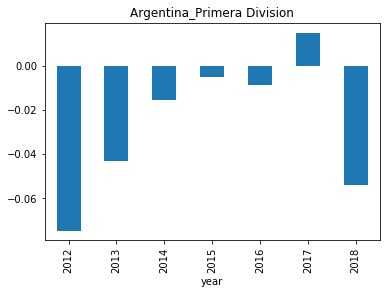

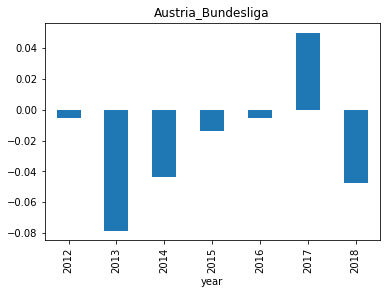

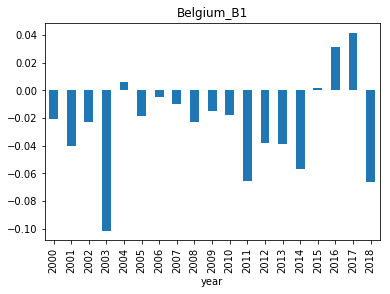

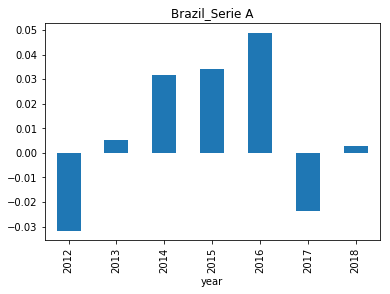

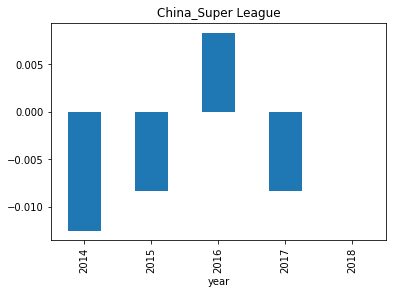

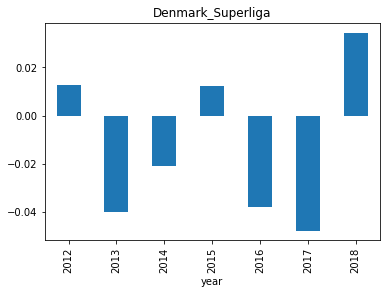

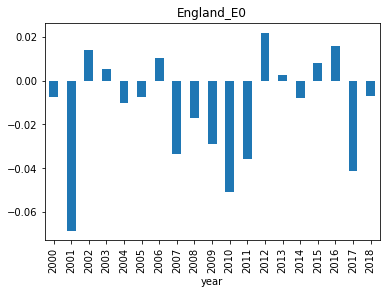

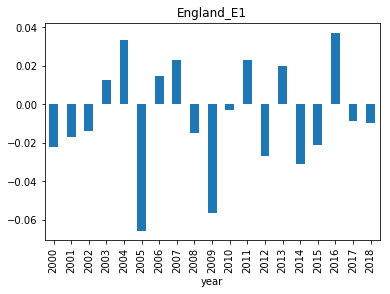

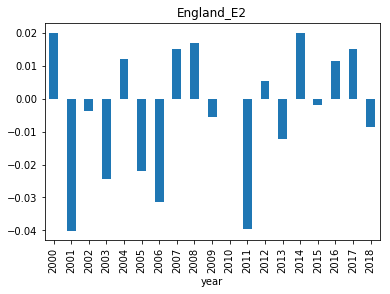

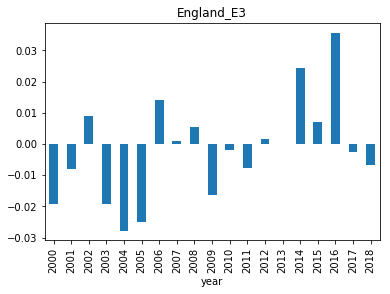

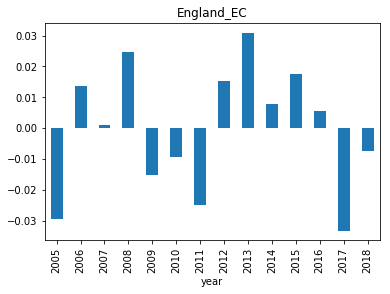

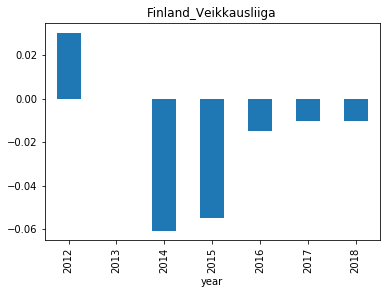

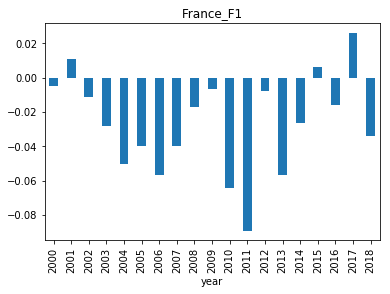

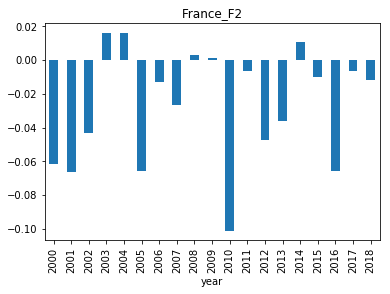

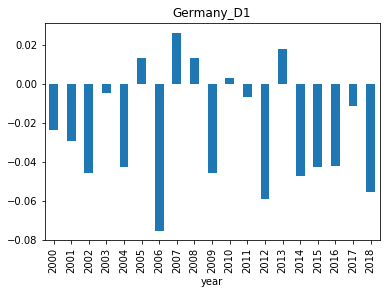

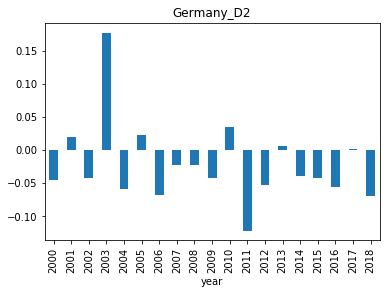

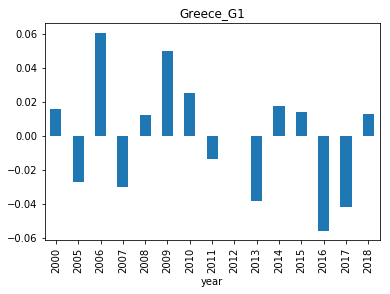

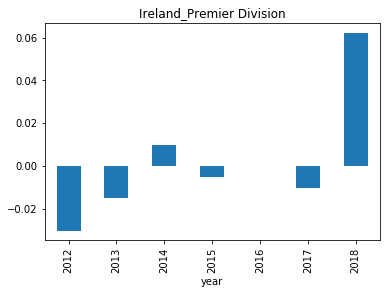

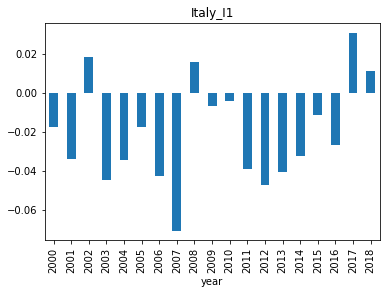

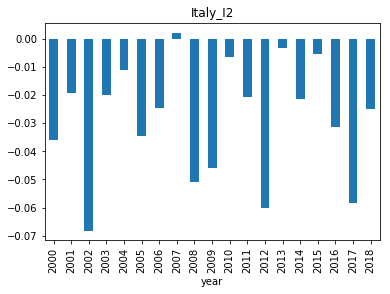

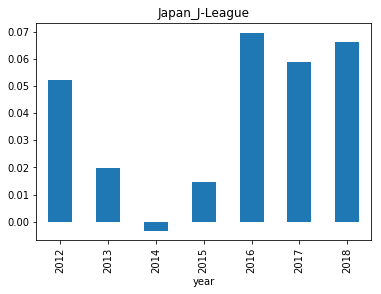

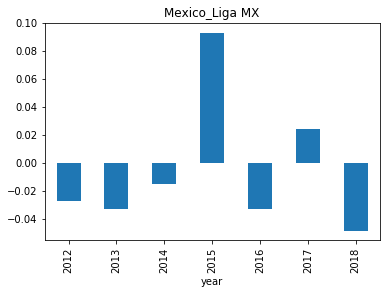

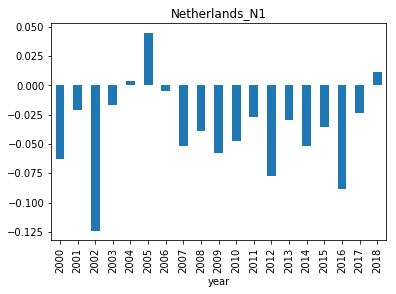

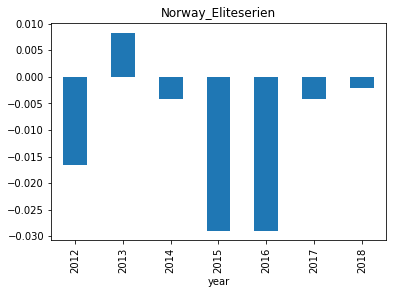

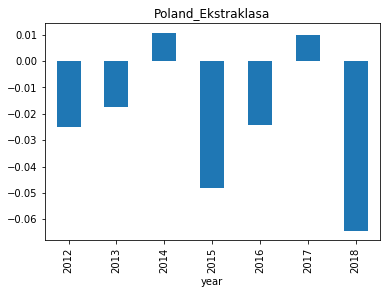

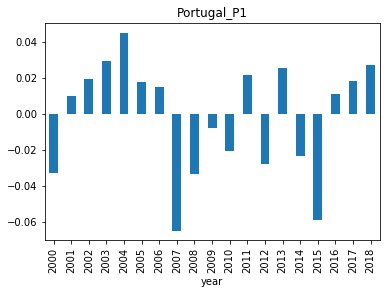

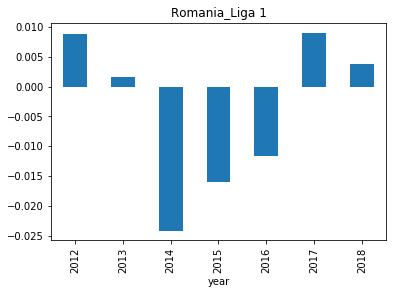

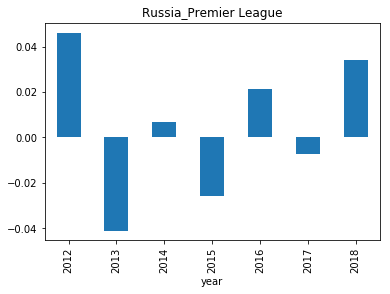

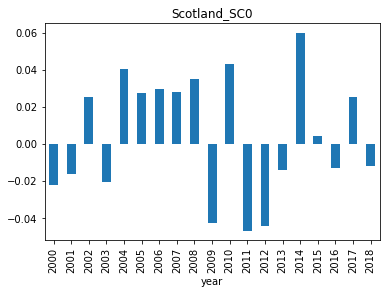

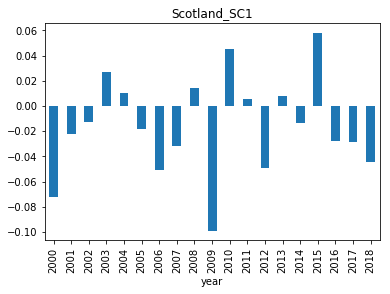

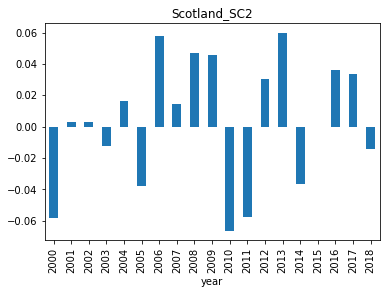

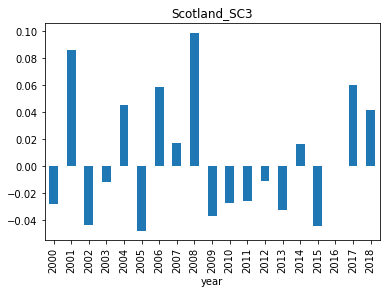

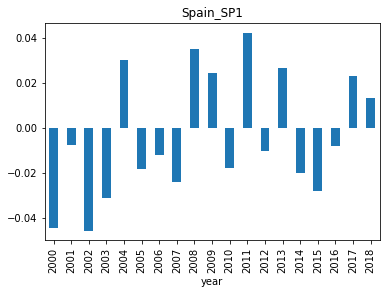

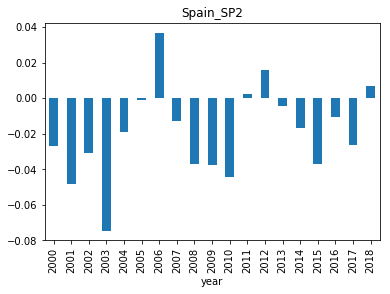

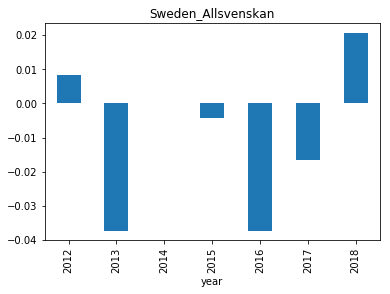

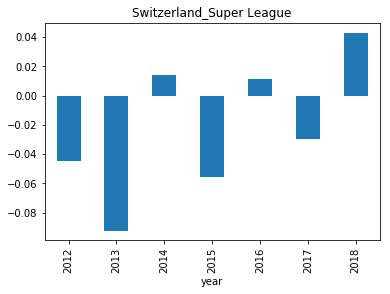

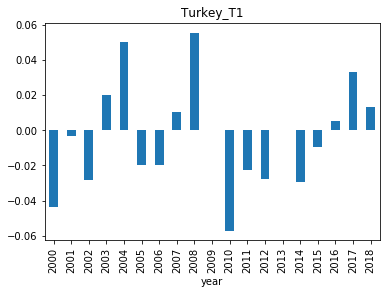

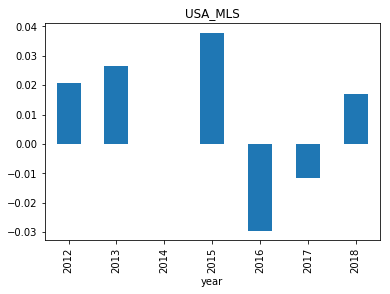

In [22]:
for cd in  df_all_year_mean.index.unique():
    df_plot = df_all_year_mean.loc[cd]
    df_plot['total_goals_odd'] -= 0.5
    df_plot.set_index('year', inplace=True)
    df_plot.plot.bar(title=cd, legend=False)

# Part1

In [66]:
df_all = df_all_raw[df_all_raw['year'] >= '2010']

In [69]:
df_all_cnt = df_all.groupby(['Country', 'Div']).count().reset_index()
df_all_cnt.rename(columns={'year': 'Count'}, inplace=True)
df_all_cnt = df_all_cnt[df_all_cnt['Count'] > 100]

df_all_mean = df_all.groupby(['Country', 'Div']).mean().reset_index()

In [70]:
df_res = pd.merge(df_all_mean, df_all_cnt[['Country', 'Div', 'Count']])

df_res['chance'] = (0.5 - df_res['total_goals_odd']).abs()

df_res.sort_values('chance', ascending=False).reset_index(drop=True)

,Country,Div,total_goals_odd,Count,chance
0,Ireland,Premier Division,0.545802,262,0.045802
1,Germany,D2,0.454583,4822,0.045417
2,Argentina,Primera Division,0.454867,565,0.045133
3,Germany,D1,0.456040,4743,0.043960
4,Japan,J-League,0.539749,2151,0.039749
5,France,F2,0.465427,4946,0.034573
6,Netherlands,N1,0.465528,4743,0.034472
7,Belgium,B1,0.465645,3522,0.034355
8,Italy,I2,0.469055,5025,0.030945
9,France,F1,0.471513,5722,0.028487


In [43]:
0.52 * 9.3 - 4.8

0.036000000000000476